# Mineral Flotation Data Exploration

This notebook provides a comprehensive exploration of the mineral flotation raw data, including:
- Data loading and basic information
- Data quality assessment (missing values, duplicates)
- Descriptive statistics
- Time series analysis
- Distribution analysis
- Correlation analysis
- Outlier detection
- Feature relationships and insights


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import sys

# Add src directory to path to import feature engineering script
sys.path.append(str(Path('..').resolve()))

from src.data.feature_engineering import engineer_features

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


## 0. Feature Engineering

Apply feature engineering to create time-based and interaction features.


In [2]:
# Run feature engineering to create engineered dataset
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Create engineered features using the feature engineering script
df_engineered = engineer_features(
    input_path='data/raw/raw.csv',
    output_path='data/processed/raw_engineered.csv'
)

print("\n✓ Feature engineering completed!")
print(f"Total features after engineering: {df_engineered.shape[1]}")
print(f"Original features: {len(pd.read_csv('data/raw/raw.csv').columns)}")
print(f"New features added: {df_engineered.shape[1] - len(pd.read_csv('data/raw/raw.csv').columns)}")


FEATURE ENGINEERING
Loading data from data/raw/raw.csv...
Original data shape: (1817, 10)

Converting date column to datetime...
Extracting time-based features...
Creating cyclical encodings for time features...
Creating interaction/ratio features...

Engineered data shape: (1817, 22)
New features added: 12

New features created:
  - month_sin
  - month_cos
  - day_sin
  - day_cos
  - hour_sin
  - hour_cos
  - day_of_week
  - is_weekend
  - amina_starch_ratio
  - flow_total
  - pulp_flow_density
  - ph_density_interaction

Saving engineered dataset to data/processed/raw_engineered.csv...
✓ Successfully saved engineered dataset to data/processed/raw_engineered.csv

SUMMARY STATISTICS FOR NEW FEATURES
       month_sin  month_cos  day_sin  day_cos  hour_sin  hour_cos  \
count   1817.000   1817.000 1817.000 1817.000  1817.000  1817.000   
mean       0.075     -0.884   -0.023    0.042     0.016     0.013   
std        0.444      0.124    0.707    0.706     0.711     0.703   
min       -1.00

## 1. Data Loading and Basic Information (Using Engineered Dataset)


In [3]:
df = df_engineered.copy()

print(f"Data shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Data shape: (1817, 22)

First few rows:


date  ave_flot_air_flow  ave_flot_level  iron_feed  \
0 2017-04-24 00:00:00            300.263         383.982     55.170   
1 2017-04-24 01:00:00            299.782         386.049     55.170   
2 2017-04-24 02:00:00            299.750         385.251     55.170   
3 2017-04-24 03:00:00            299.998         389.636     55.170   
4 2017-04-24 04:00:00            300.005         387.811     55.170   

   starch_flow  amina_flow  ore_pulp_flow  ore_pulp_pH  ore_pulp_density  \
0     1979.589     599.676        400.017        9.774             1.753   
1     1758.466     600.043        400.485        9.539             1.754   
2     2379.752     599.948        400.326        9.434             1.757   
3     2287.130     599.580        399.802        9.726             1.727   
4     2291.789     599.871        399.567        9.845             1.633   

   silica_concentrate  month_sin  month_cos  day_sin  day_cos  hour_sin  \
0               4.360      0.866     -0.500   -0.988    0.151     0.000   
1               3.290      0.866     -0.500   -0.988    0.151     0.259   
2               4.900      0.866     -0.500   -0.988    0.151     0.500   
3               4.860      0.866     -0.500   -0.988    0.151     0.707   
4               4.781      0.866     -0.500   -0.988    0.151     0.866   

   hour_cos  day_of_week  is_weekend  amina_starch_ratio  flow_total  \
0     1.000            0           0               0.303    3279.546   
1     0.966            0           0               0.341    3058.776   
2     0.866            0           0               0.252    3679.777   
3     0.707            0           0               0.262    3586.509   
4     0.500            0           0               0.262    3591.233   

   pulp_flow_density  ph_density_interaction  
0            701.313                  17.136  
1            702.526                  16.734  
2            703.321                  16.575  
3            690.507                  16.797  
4            652.519                  16.078

In [4]:
# Ensure numeric_cols includes all numerical features (including engineered ones)
# This will be used throughout the notebook for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target variable from feature list for some analyses
feature_cols = [col for col in numeric_cols if col != 'silica_concentrate']

print(f"Total numerical features: {len(numeric_cols)}")
print(f"Feature columns (excluding target): {len(feature_cols)}")
print(f"\nAll numerical columns: {numeric_cols}")


Total numerical features: 21
Feature columns (excluding target): 20

All numerical columns: ['ave_flot_air_flow', 'ave_flot_level', 'iron_feed', 'starch_flow', 'amina_flow', 'ore_pulp_flow', 'ore_pulp_pH', 'ore_pulp_density', 'silica_concentrate', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'day_of_week', 'is_weekend', 'amina_starch_ratio', 'flow_total', 'pulp_flow_density', 'ph_density_interaction']


In [5]:
# Basic information about the dataset
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nNumber of rows: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nData types:")
print(df.dtypes)


DATASET INFORMATION

Number of rows: 1,817
Number of columns: 22

Column names:
  1. date
  2. ave_flot_air_flow
  3. ave_flot_level
  4. iron_feed
  5. starch_flow
  6. amina_flow
  7. ore_pulp_flow
  8. ore_pulp_pH
  9. ore_pulp_density
  10. silica_concentrate
  11. month_sin
  12. month_cos
  13. day_sin
  14. day_cos
  15. hour_sin
  16. hour_cos
  17. day_of_week
  18. is_weekend
  19. amina_starch_ratio
  20. flow_total
  21. pulp_flow_density
  22. ph_density_interaction

Data types:
date                      datetime64[ns]
ave_flot_air_flow                float64
ave_flot_level                   float64
iron_feed                        float64
starch_flow                      float64
amina_flow                       float64
ore_pulp_flow                    float64
ore_pulp_pH                      float64
ore_pulp_density                 float64
silica_concentrate               float64
month_sin                        float64
month_cos                        float64
day_sin    

## 2. Data Quality Assessment


In [6]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")


MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!

Total missing values: 0


In [7]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 0
✓ No duplicate rows found!


In [8]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check date range and time gaps
print("=" * 60)
print("TIME SERIES INFORMATION")
print("=" * 60)
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total time span: {df['date'].max() - df['date'].min()}")
print(f"Number of unique dates: {df['date'].nunique()}")

# Check for time gaps
df_sorted = df.sort_values('date')
time_diffs = df_sorted['date'].diff()
print(f"\nExpected hourly frequency: 1 hour")
print(f"Most common time difference: {time_diffs.mode().iloc[0] if len(time_diffs.mode()) > 0 else 'N/A'}")
print(f"Time gaps (differences > 1 hour): {(time_diffs > pd.Timedelta('1 hour')).sum()}")


TIME SERIES INFORMATION
Date range: 2017-04-24 00:00:00 to 2017-09-08 15:00:00
Total time span: 137 days 15:00:00
Number of unique dates: 1817

Expected hourly frequency: 1 hour
Most common time difference: 0 days 01:00:00
Time gaps (differences > 1 hour): 157


## 3. Descriptive Statistics


In [9]:
# Descriptive statistics for numerical columns
print("=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
desc_stats = df[numeric_cols].describe()
print(desc_stats)


DESCRIPTIVE STATISTICS
       ave_flot_air_flow  ave_flot_level  iron_feed  starch_flow  amina_flow  \
count           1817.000        1817.000   1817.000     1817.000    1817.000   
mean             296.036         457.719     57.595     3106.798     502.076   
std                6.342          66.964      5.754      831.195      65.958   
min              282.466         306.749     43.370      401.629     301.264   
25%              291.643         408.780     52.670     2554.580     454.770   
50%              299.860         421.506     57.380     3144.695     509.369   
75%              299.962         500.251     64.030     3648.293     553.007   
max              301.339         767.640     65.780     5556.094     715.748   

       ore_pulp_flow  ore_pulp_pH  ore_pulp_density  silica_concentrate  \
count       1817.000     1817.000          1817.000            1817.000   
mean         400.015        9.896             1.682               2.162   
std            0.866        0.2

In [10]:
# Additional statistics: skewness and kurtosis
print("\n" + "=" * 60)
print("SKEWNESS AND KURTOSIS")
print("=" * 60)

additional_stats = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurtosis()
})
additional_stats = additional_stats.sort_values('Skewness', key=abs, ascending=False)
print(additional_stats)

print("\nInterpretation:")
print("- Skewness: |value| > 0.5 indicates moderate skewness, |value| > 1 indicates high skewness")
print("- Kurtosis: |value| > 0.5 indicates heavy tails (leptokurtic) or light tails (platykurtic)")



SKEWNESS AND KURTOSIS
                        Skewness  Kurtosis
amina_starch_ratio         4.985    56.670
month_cos                  2.009     5.079
ave_flot_air_flow         -1.236    -0.153
silica_concentrate         1.157     0.468
is_weekend                 0.932    -1.133
ave_flot_level             0.728    -0.245
ore_pulp_density          -0.610     0.003
pulp_flow_density         -0.588    -0.039
ph_density_interaction    -0.384    -0.007
amina_flow                -0.356    -0.464
ore_pulp_pH               -0.257     0.148
iron_feed                 -0.225    -1.200
ore_pulp_flow              0.215     1.641
day_cos                   -0.103    -1.502
starch_flow               -0.087     0.003
day_sin                    0.072    -1.509
flow_total                -0.070     0.051
day_of_week               -0.047    -1.265
month_sin                 -0.034    -1.151
hour_sin                  -0.033    -1.517
hour_cos                  -0.022    -1.495

Interpretation:
- Skewness: |v

## 4. Time Series Analysis


TIME-BASED FEATURES COMPARISON WITH TARGET VARIABLE

CYCLICAL ENCODED FEATURES:

HOUR (cyclical):
  hour_sin correlation: 0.023
  hour_cos correlation: -0.058

MONTH (cyclical):
  month_sin correlation: 0.189
  month_cos correlation: 0.122

DAY (cyclical):
  day_sin correlation: 0.025
  day_cos correlation: -0.010

OTHER TIME FEATURES:

DAY_OF_WEEK:
  Correlation with silica_concentrate: -0.101
             mean   std  count
day_of_week                   
0           2.464 1.143    268
1           2.170 0.996    257
2           2.145 1.074    240
3           2.024 1.010    245
4           2.164 0.988    282
5           2.171 1.093    289
6           1.956 0.936    236

IS_WEEKEND:
  Correlation with silica_concentrate: -0.053
            mean   std  count
is_weekend                   
0          2.197 1.052   1292
1          2.074 1.030    525


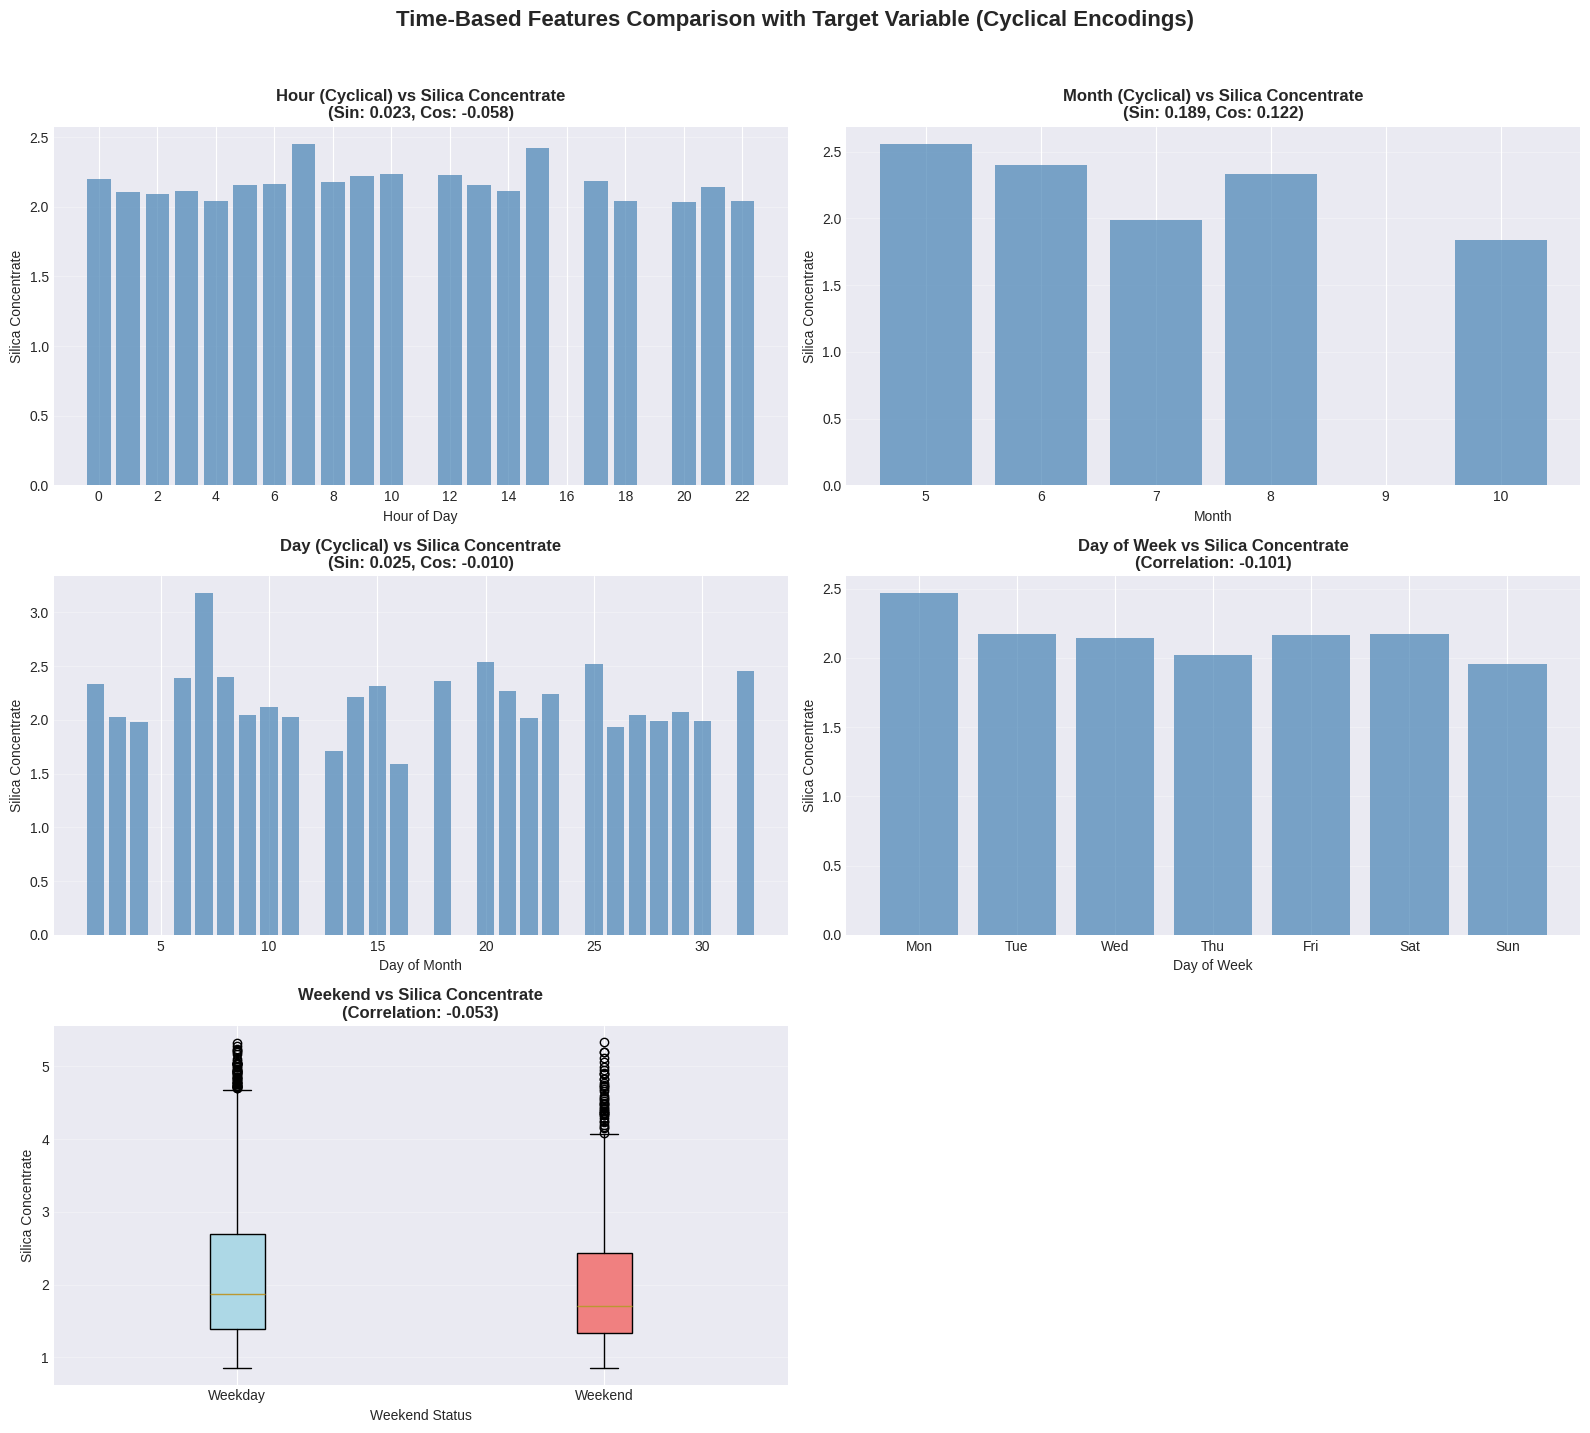

In [11]:
# Compare all time-based engineered features with target variable
# Note: hour, month, and day are now cyclical encoded (sin/cos pairs)
# day_of_week and is_weekend remain as-is

print("=" * 60)
print("TIME-BASED FEATURES COMPARISON WITH TARGET VARIABLE")
print("=" * 60)

# Define cyclical feature pairs and other time features
cyclical_features = {
    'hour': ['hour_sin', 'hour_cos'],
    'month': ['month_sin', 'month_cos'],
    'day': ['day_sin', 'day_cos']
}
other_time_features = ['day_of_week', 'is_weekend']

# Calculate correlations for cyclical features
print("\nCYCLICAL ENCODED FEATURES:")
correlations = {}
for original_name, (sin_feat, cos_feat) in cyclical_features.items():
    if sin_feat in df.columns and cos_feat in df.columns:
        sin_corr = df[sin_feat].corr(df['silica_concentrate'])
        cos_corr = df[cos_feat].corr(df['silica_concentrate'])
        # Store both correlations
        correlations[sin_feat] = sin_corr
        correlations[cos_feat] = cos_corr
        print(f"\n{original_name.upper()} (cyclical):")
        print(f"  {sin_feat} correlation: {sin_corr:.3f}")
        print(f"  {cos_feat} correlation: {cos_corr:.3f}")

# Calculate correlations for other time features
print("\nOTHER TIME FEATURES:")
for feat in other_time_features:
    if feat in df.columns:
        corr = df[feat].corr(df['silica_concentrate'])
        correlations[feat] = corr
        print(f"\n{feat.upper()}:")
        print(f"  Correlation with silica_concentrate: {corr:.3f}")
        if feat == 'day_of_week':
            pattern = df.groupby(feat)['silica_concentrate'].agg(['mean', 'std', 'count'])
            print(pattern)
        elif feat == 'is_weekend':
            pattern = df.groupby(feat)['silica_concentrate'].agg(['mean', 'std', 'count'])
            print(pattern)

# Visualize patterns for time features
# Reconstruct original values for visualization purposes
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot_idx = 0

# Visualize cyclical features by reconstructing original values
for original_name, (sin_feat, cos_feat) in cyclical_features.items():
    if sin_feat not in df.columns or cos_feat not in df.columns:
        continue
    
    ax = axes[plot_idx]
    
    # Reconstruct original values for visualization
    if original_name == 'hour':
        # Reconstruct hour from sin/cos
        reconstructed = np.arctan2(df[sin_feat], df[cos_feat]) * 24 / (2 * np.pi)
        reconstructed = np.mod(reconstructed, 24).astype(int)
        pattern_mean = df.groupby(reconstructed)['silica_concentrate'].mean()
        ax.bar(pattern_mean.index, pattern_mean.values, alpha=0.7, color='steelblue')
        ax.set_xlabel('Hour of Day')
        ax.set_xticks(range(0, 24, 2))
        sin_corr = correlations.get(sin_feat, 0)
        cos_corr = correlations.get(cos_feat, 0)
        ax.set_title(f'Hour (Cyclical) vs Silica Concentrate\n(Sin: {sin_corr:.3f}, Cos: {cos_corr:.3f})', 
                    fontsize=12, fontweight='bold')
    
    elif original_name == 'month':
        # Reconstruct month from sin/cos
        reconstructed = np.arctan2(df[sin_feat], df[cos_feat]) * 12 / (2 * np.pi)
        reconstructed = np.mod(reconstructed, 12).astype(int) + 1
        pattern_mean = df.groupby(reconstructed)['silica_concentrate'].mean()
        ax.bar(pattern_mean.index, pattern_mean.values, alpha=0.7, color='steelblue')
        ax.set_xlabel('Month')
        ax.set_title(f'Month (Cyclical) vs Silica Concentrate\n(Sin: {correlations.get(sin_feat, 0):.3f}, Cos: {correlations.get(cos_feat, 0):.3f})', 
                    fontsize=12, fontweight='bold')
    
    elif original_name == 'day':
        # Reconstruct day from sin/cos
        reconstructed = np.arctan2(df[sin_feat], df[cos_feat]) * 31 / (2 * np.pi)
        reconstructed = np.mod(reconstructed, 31).astype(int) + 1
        # Sample for visualization (too many days)
        pattern_mean = df.groupby(reconstructed)['silica_concentrate'].mean()
        ax.bar(pattern_mean.index, pattern_mean.values, alpha=0.7, color='steelblue')
        ax.set_xlabel('Day of Month')
        ax.set_title(f'Day (Cyclical) vs Silica Concentrate\n(Sin: {correlations.get(sin_feat, 0):.3f}, Cos: {correlations.get(cos_feat, 0):.3f})', 
                    fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Silica Concentrate')
    ax.grid(True, alpha=0.3, axis='y')
    plot_idx += 1

# Visualize other time features
for feat in other_time_features:
    if feat not in df.columns:
        continue
    
    ax = axes[plot_idx]
    
    if feat == 'day_of_week':
        # Day of week: bar plot
        pattern_mean = df.groupby(feat)['silica_concentrate'].mean()
        ax.bar(range(len(pattern_mean)), pattern_mean.values, alpha=0.7, color='steelblue')
        ax.set_xticks(range(7))
        ax.set_xticklabels(day_names)
        ax.set_xlabel('Day of Week')
        ax.set_title(f'Day of Week vs Silica Concentrate\n(Correlation: {correlations[feat]:.3f})', 
                    fontsize=12, fontweight='bold')
    
    elif feat == 'is_weekend':
        # Weekend: box plot
        weekend_data = [df[df[feat] == 0]['silica_concentrate'], 
                       df[df[feat] == 1]['silica_concentrate']]
        bp = ax.boxplot(weekend_data, labels=['Weekday', 'Weekend'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][1].set_facecolor('lightcoral')
        ax.set_xlabel('Weekend Status')
        ax.set_title(f'Weekend vs Silica Concentrate\n(Correlation: {correlations[feat]:.3f})', 
                    fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Silica Concentrate')
    ax.grid(True, alpha=0.3, axis='y')
    plot_idx += 1

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].axis('off')

plt.suptitle('Time-Based Features Comparison with Target Variable (Cyclical Encodings)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


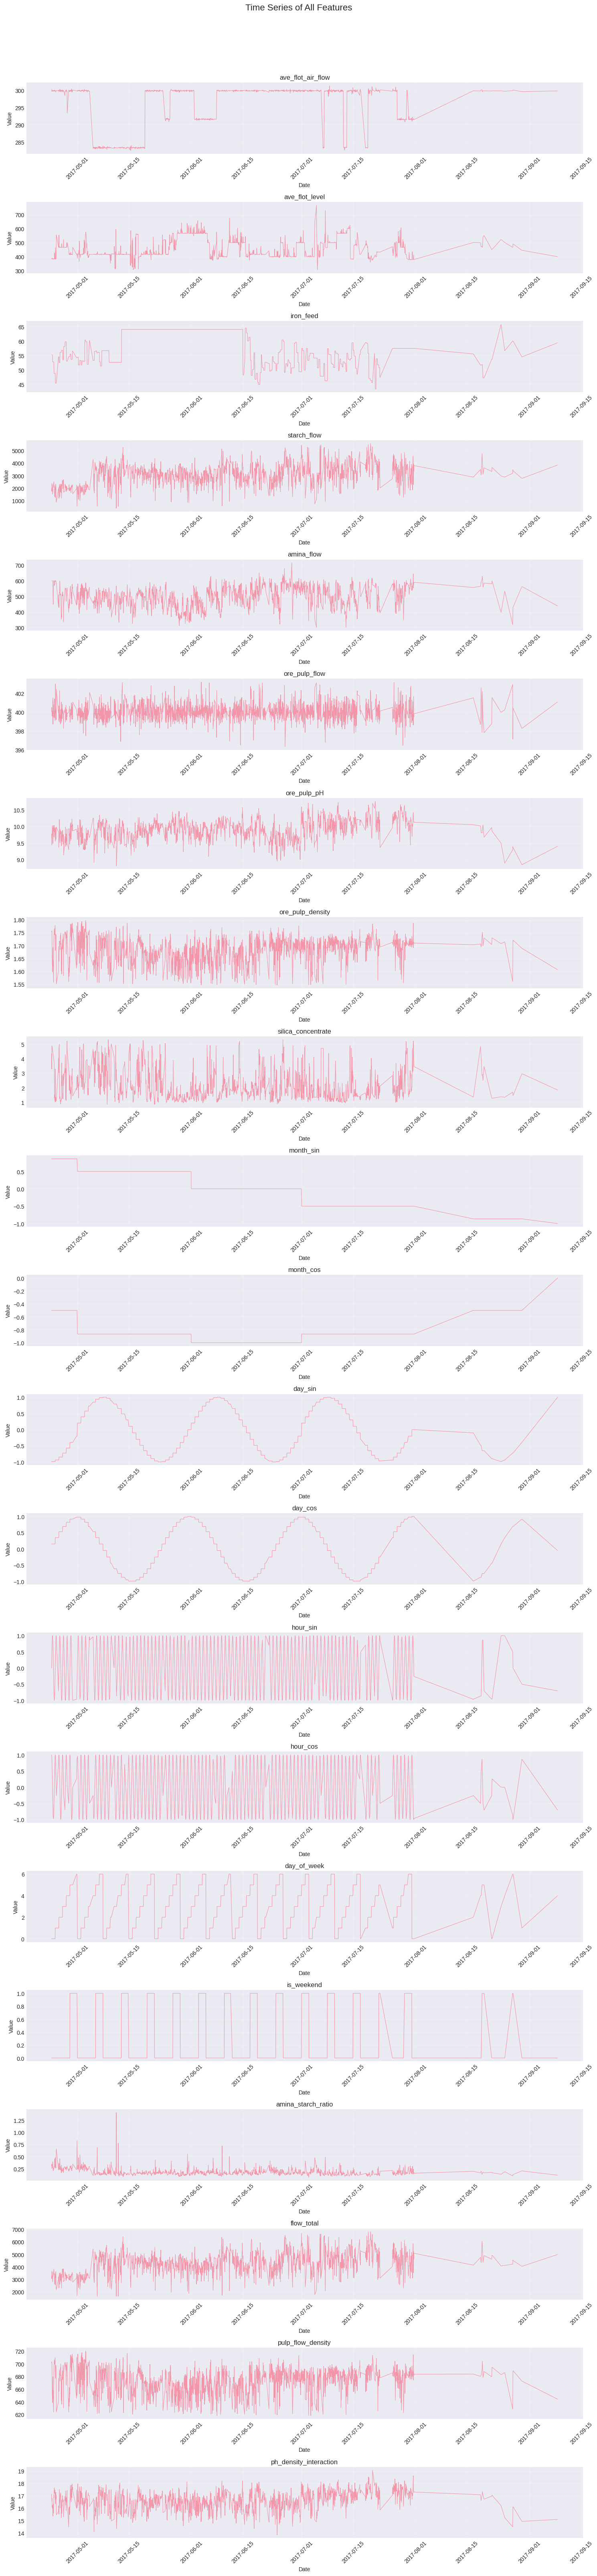

In [12]:
# Set date as index for time series analysis
df_ts = df.set_index('date').sort_index()

# Plot time series for all numerical features
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15, 3 * len(numeric_cols)))
fig.suptitle('Time Series of All Features', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    axes[i].plot(df_ts.index, df_ts[col], linewidth=0.8, alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


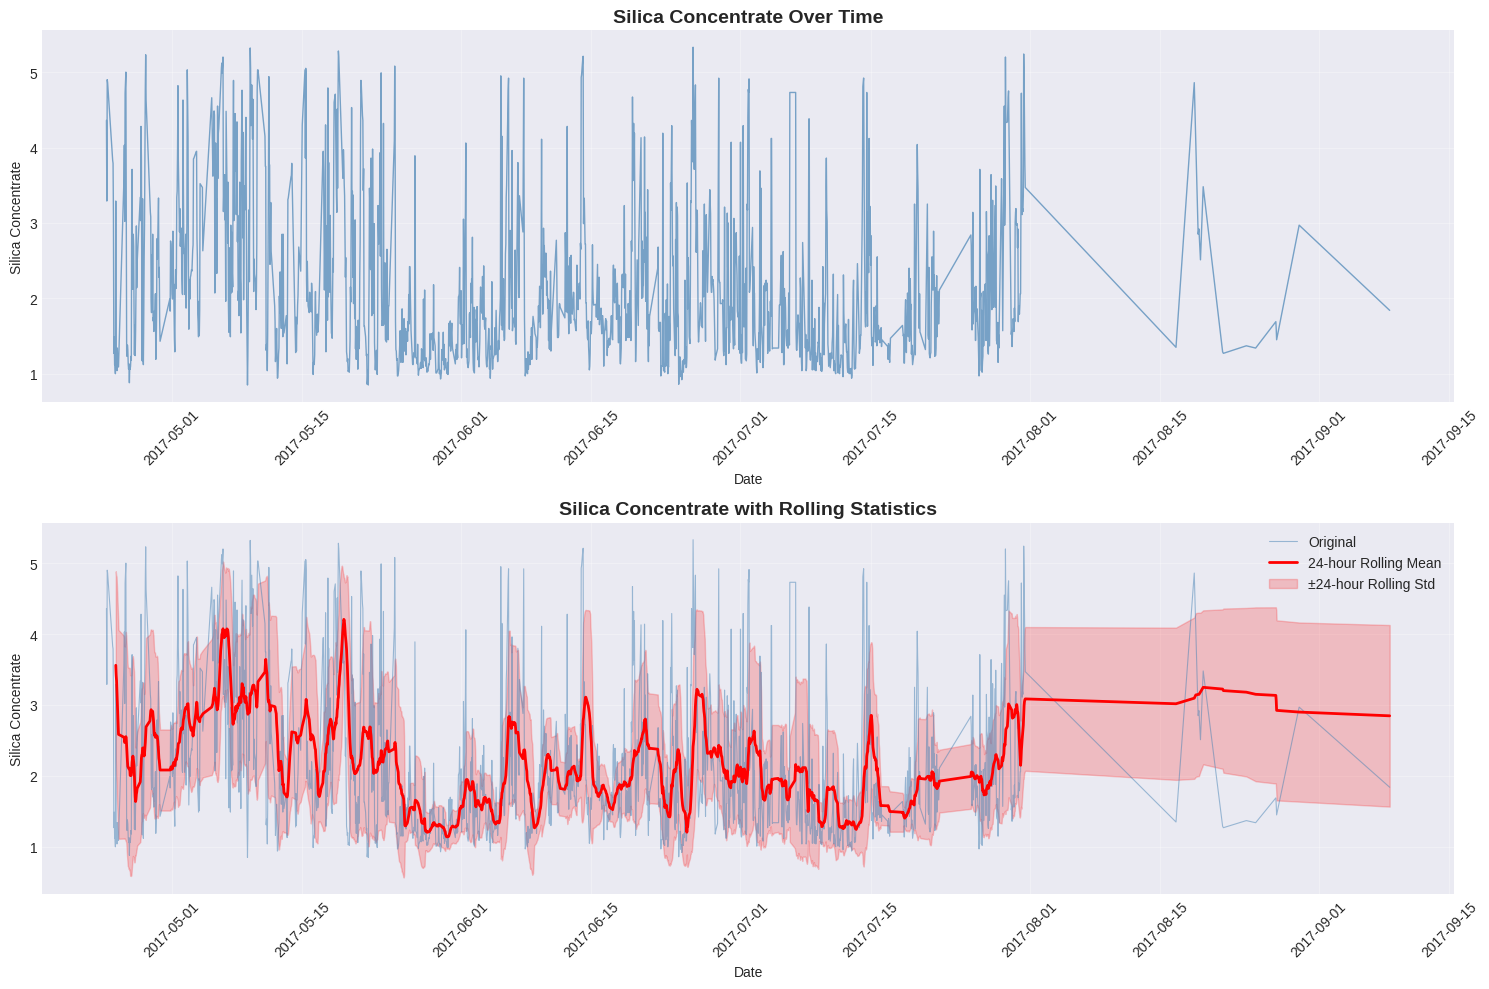

In [13]:
# Focus on target variable: silica_concentrate
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Time series plot
axes[0].plot(df_ts.index, df_ts['silica_concentrate'], linewidth=1, alpha=0.7, color='steelblue')
axes[0].set_title('Silica Concentrate Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Silica Concentrate')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Rolling statistics
window = 24  # 24-hour rolling window
df_ts['silica_rolling_mean'] = df_ts['silica_concentrate'].rolling(window=window).mean()
df_ts['silica_rolling_std'] = df_ts['silica_concentrate'].rolling(window=window).std()

axes[1].plot(df_ts.index, df_ts['silica_concentrate'], linewidth=0.8, alpha=0.5, label='Original', color='steelblue')
axes[1].plot(df_ts.index, df_ts['silica_rolling_mean'], linewidth=2, label=f'{window}-hour Rolling Mean', color='red')
axes[1].fill_between(df_ts.index, 
                     df_ts['silica_rolling_mean'] - df_ts['silica_rolling_std'],
                     df_ts['silica_rolling_mean'] + df_ts['silica_rolling_std'],
                     alpha=0.2, color='red', label=f'±{window}-hour Rolling Std')
axes[1].set_title('Silica Concentrate with Rolling Statistics', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Silica Concentrate')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


HOURLY PATTERNS IN SILICA CONCENTRATE
      mean   std  count
hour                   
0    2.202 1.121     76
1    2.106 0.939     78
2    2.092 1.059     80
3    2.111 1.094     80
4    2.045 0.939     79
5    2.154 1.103     75
6    2.165 1.010     81
7    2.453 1.172     81
8    2.179 0.997     79
9    2.220 1.109     76
10   2.337 1.232     76
11   2.124 1.083     71
12   2.191 1.016     67
13   2.262 1.096     73
14   2.156 1.005     72
15   2.115 0.991     75
16   2.424 1.102     77
17   2.188 0.992     75
18   2.149 1.047     71
19   1.939 0.834     74
20   2.034 0.979     75
21   2.140 0.989     76
22   2.116 1.144     79
23   1.953 0.972     71


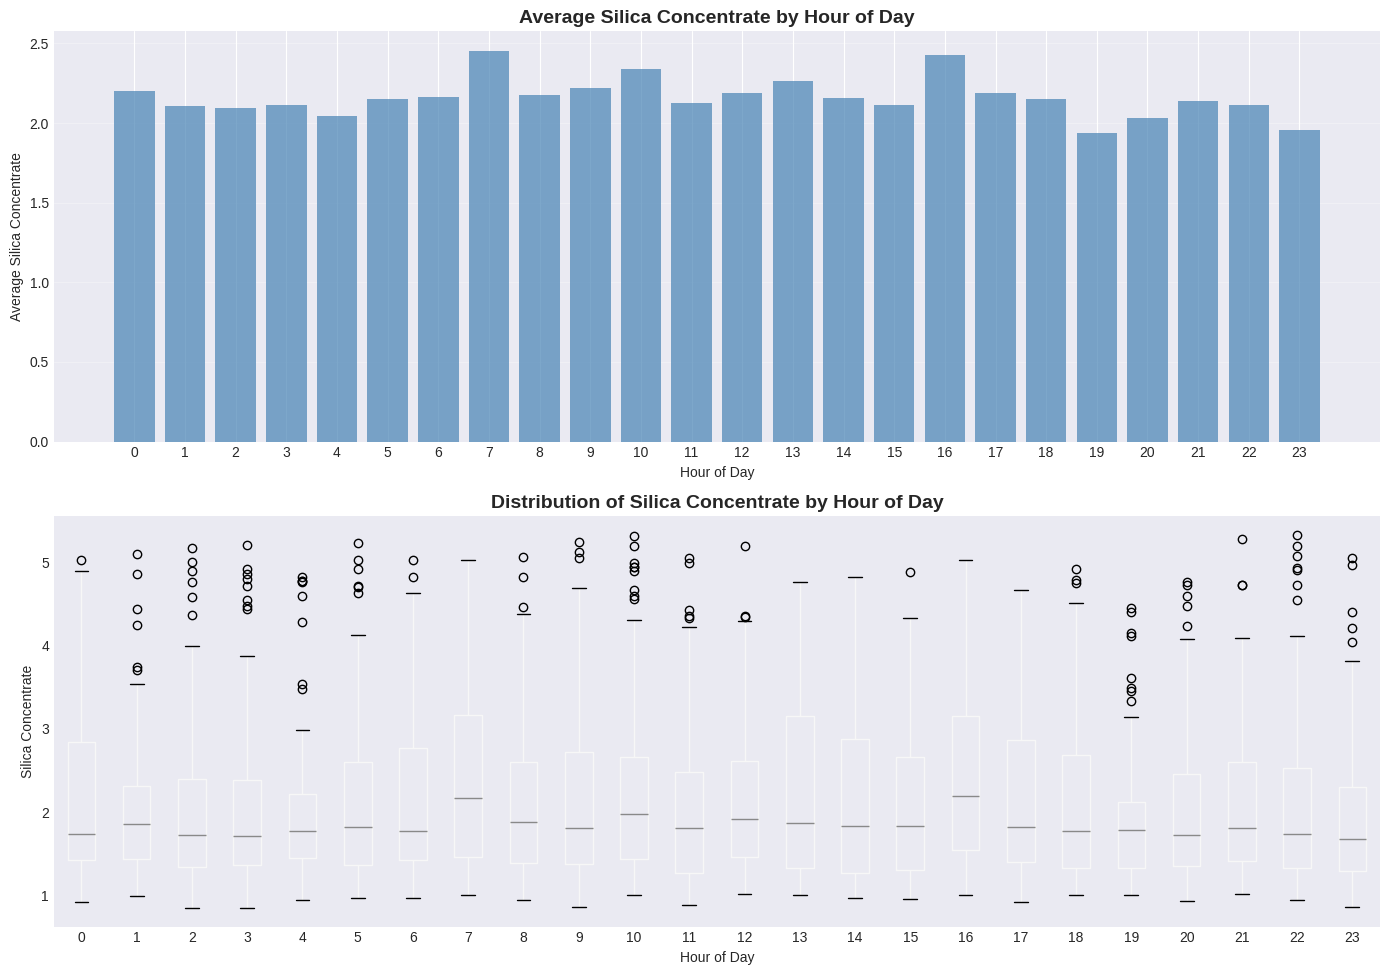

In [14]:
# Extract time-based features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Analyze patterns by hour
hourly_pattern = df.groupby('hour')['silica_concentrate'].agg(['mean', 'std', 'count'])
print("=" * 60)
print("HOURLY PATTERNS IN SILICA CONCENTRATE")
print("=" * 60)
print(hourly_pattern)

# Visualize hourly patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Mean silica concentrate by hour
hourly_mean = df.groupby('hour')['silica_concentrate'].mean()
axes[0].bar(hourly_mean.index, hourly_mean.values, alpha=0.7, color='steelblue')
axes[0].set_title('Average Silica Concentrate by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Silica Concentrate')
axes[0].set_xticks(range(24))
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot by hour
df.boxplot(column='silica_concentrate', by='hour', ax=axes[1], grid=False)
axes[1].set_title('Distribution of Silica Concentrate by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Silica Concentrate')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


## 5. Distribution Analysis


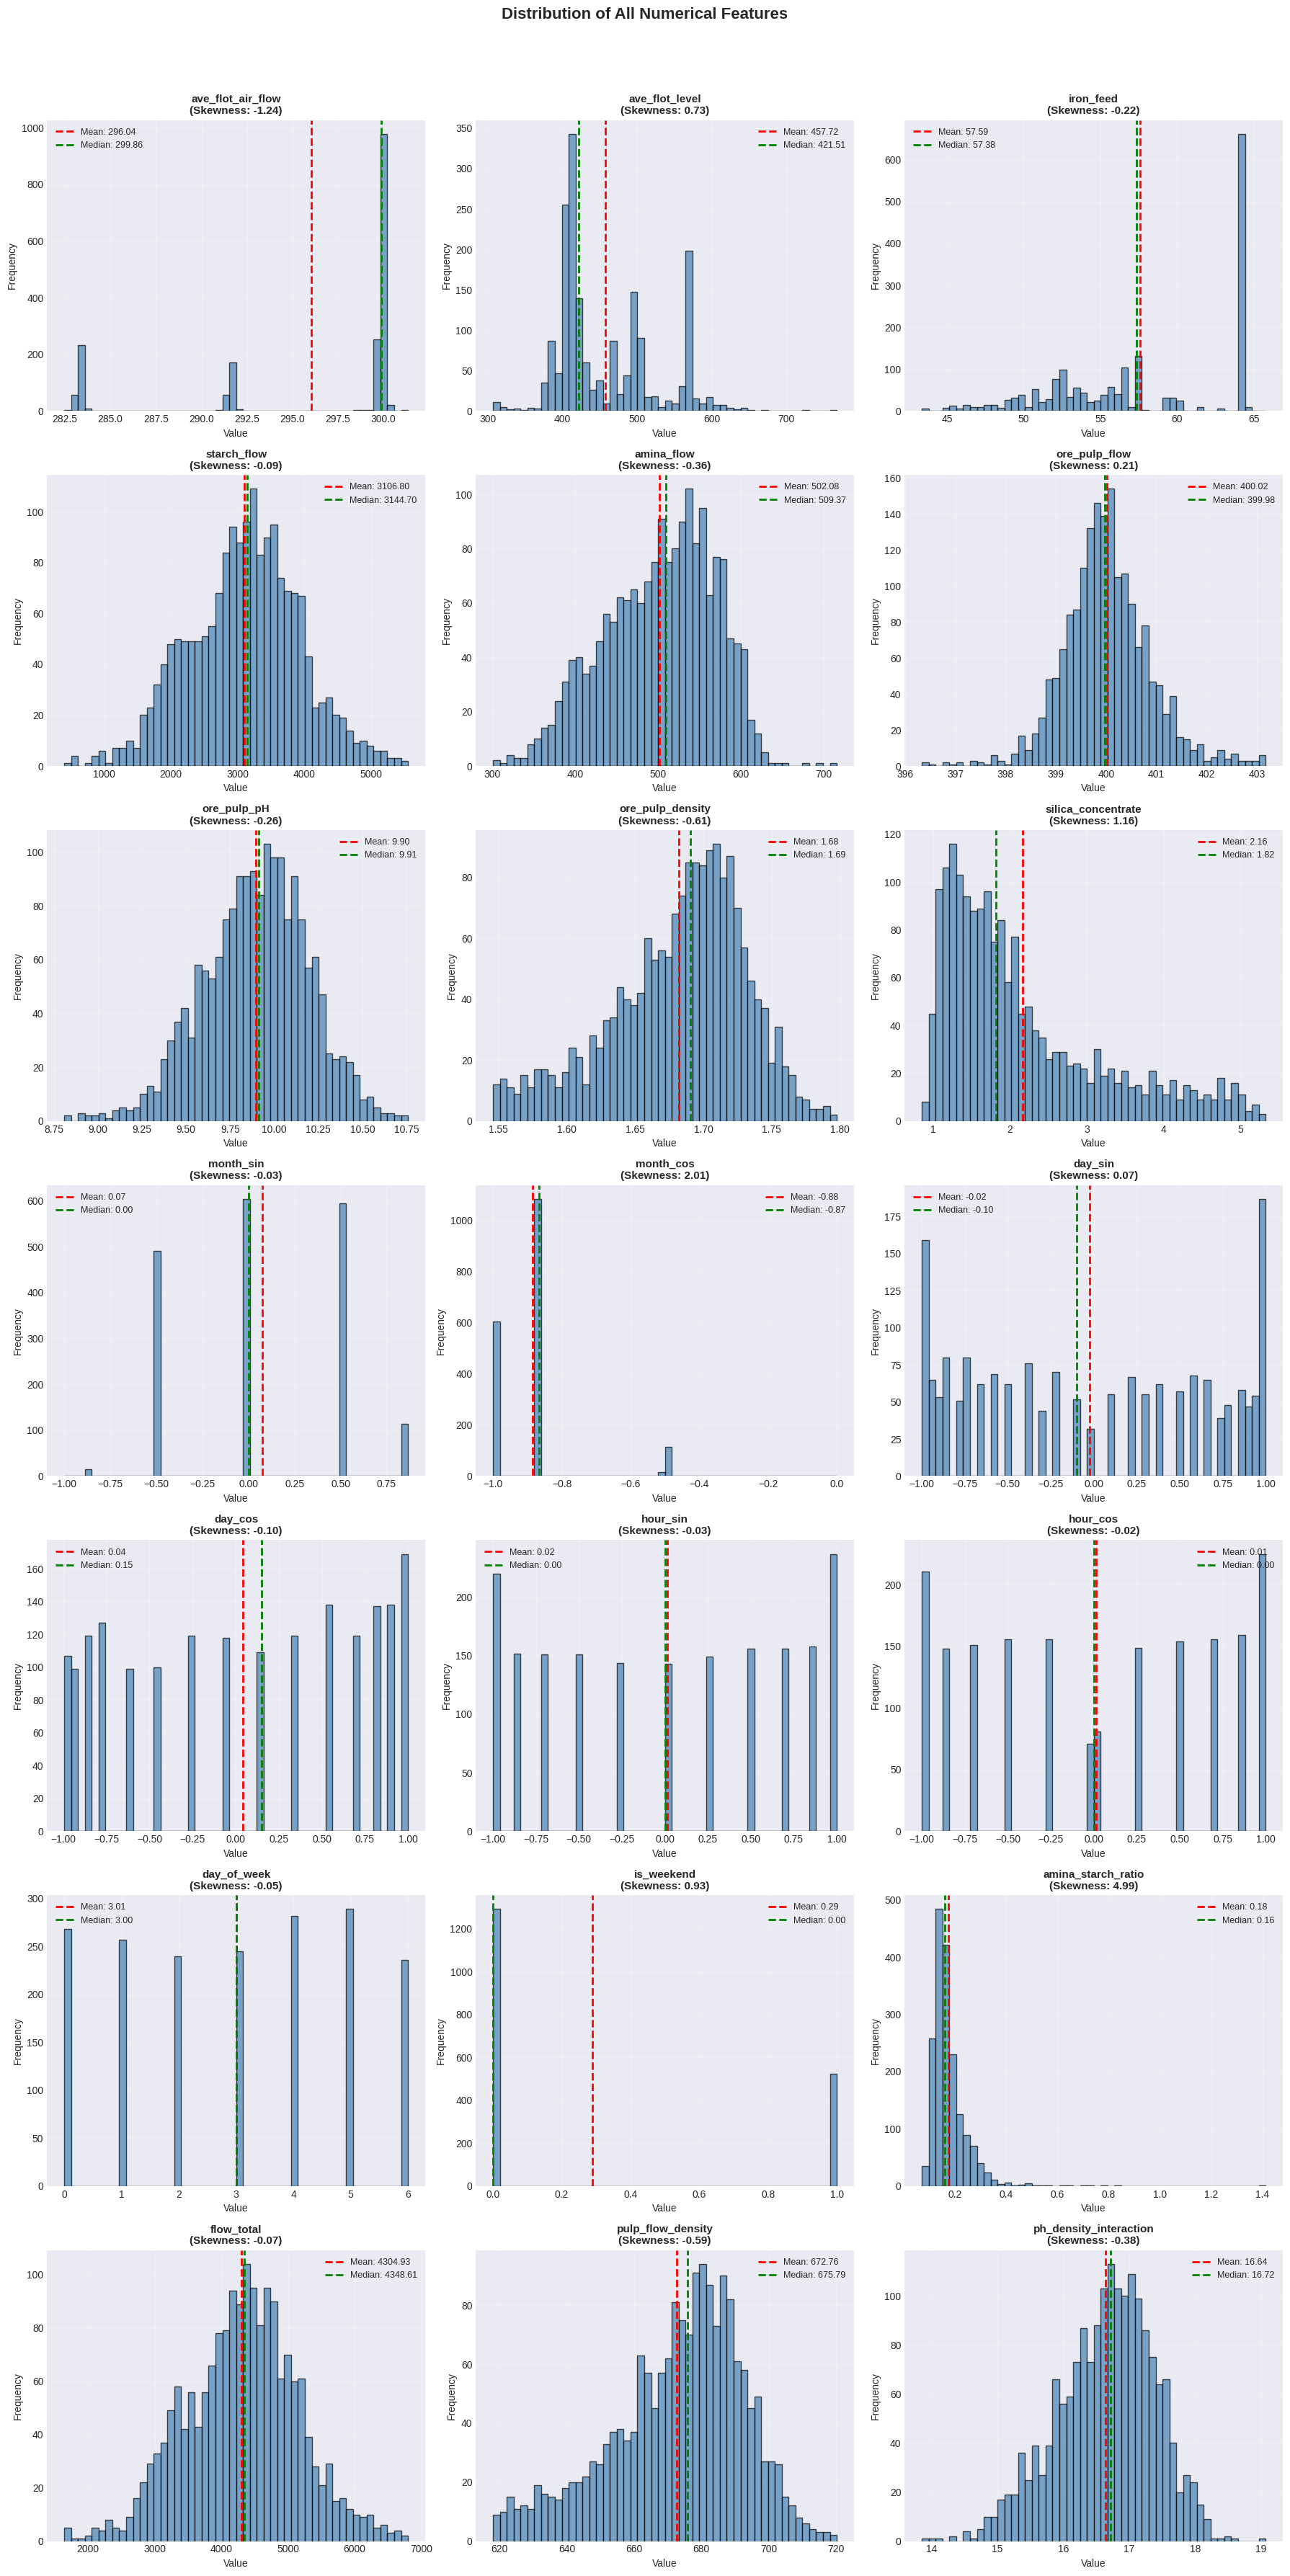

In [15]:
# Distribution plots for all numerical features
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Histogram
    ax.hist(df[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    ax.set_title(f'{col}\n(Skewness: {df[col].skew():.2f})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Distribution of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


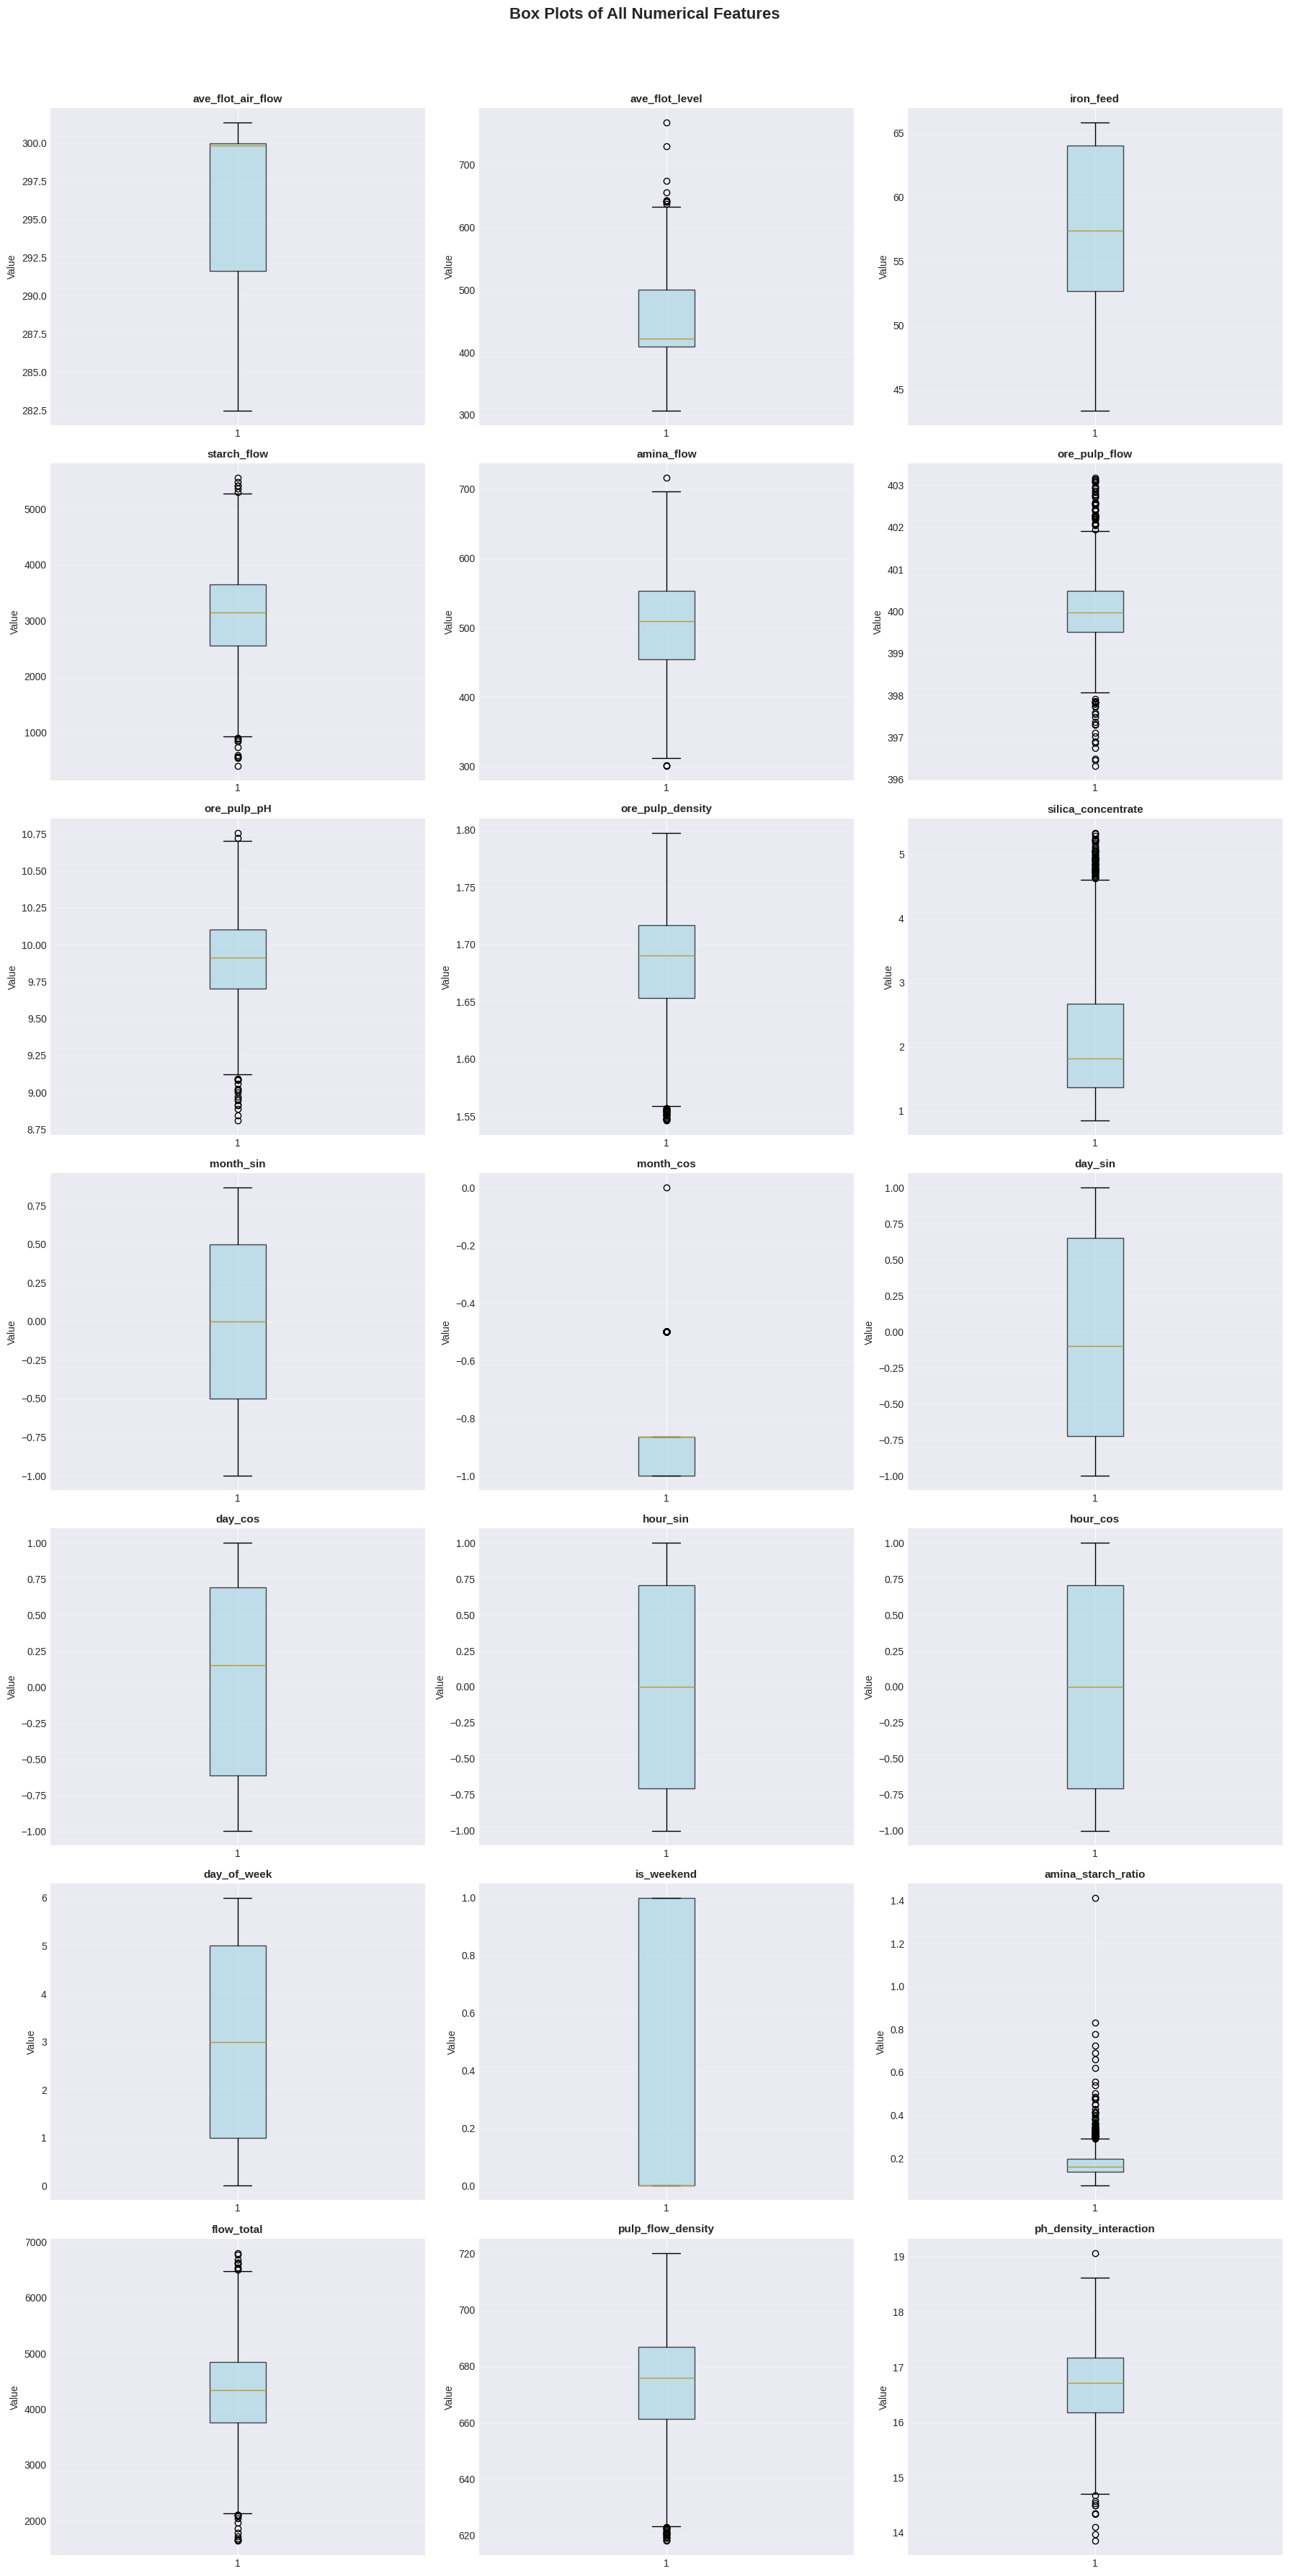

In [16]:
# Box plots for all features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    bp = ax.boxplot(df[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3, axis='y')

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Box Plots of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 6. Correlation Analysis


## 6.1 Comprehensive Correlation Analysis (All Features Including Engineered)

Visualize correlations for ALL features including the newly engineered features.


COMPREHENSIVE CORRELATION ANALYSIS - ALL FEATURES

Total numerical features (including engineered): 24

All numerical features:
   1. ave_flot_air_flow
   2. ave_flot_level
   3. iron_feed
   4. starch_flow
   5. amina_flow
   6. ore_pulp_flow
   7. ore_pulp_pH
   8. ore_pulp_density
   9. silica_concentrate
  10. month_sin
  11. month_cos
  12. day_sin
  13. day_cos
  14. hour_sin
  15. hour_cos
  16. day_of_week
  17. is_weekend
  18. amina_starch_ratio
  19. flow_total
  20. pulp_flow_density
  21. ph_density_interaction
  22. hour
  23. month
  24. day


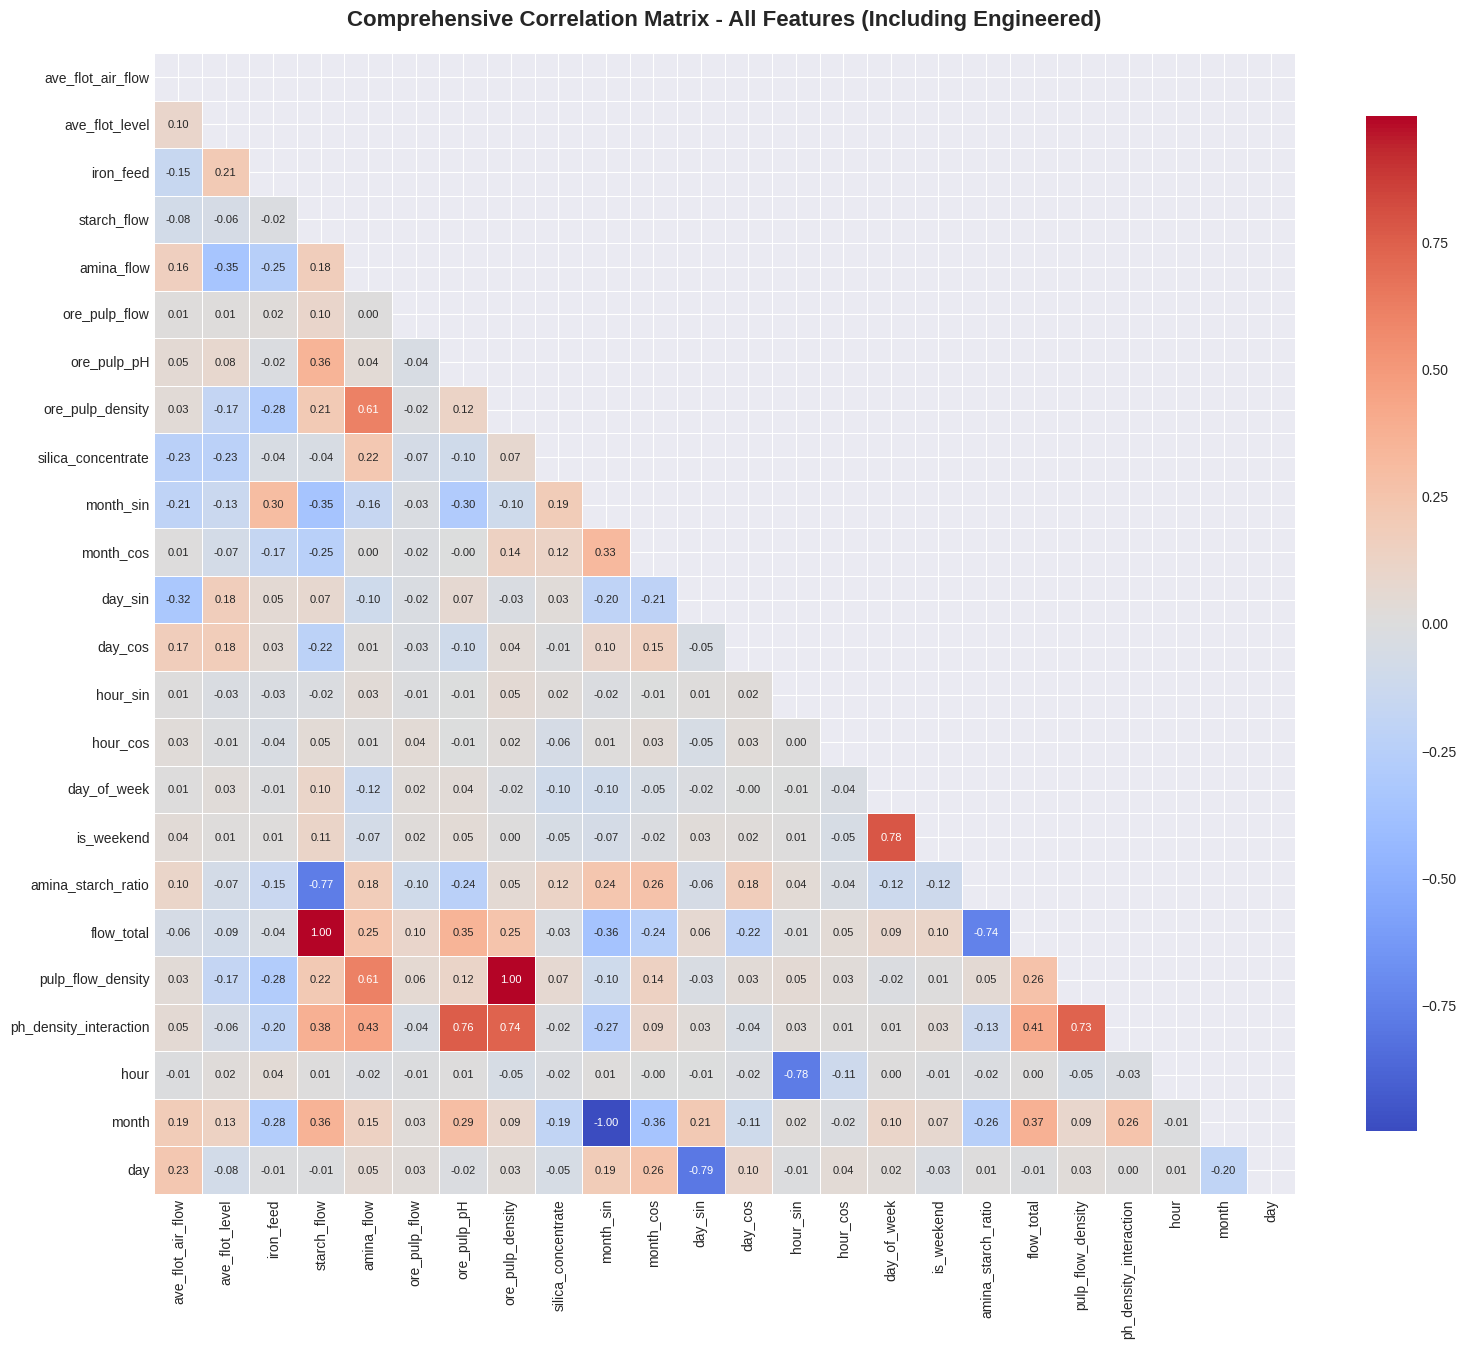

In [17]:
# Get all numerical features (including engineered ones)
# Exclude date column and any non-numerical columns
all_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude date-related categorical columns if they exist (keep only numerical)
# But keep hour, day_of_week, month, day, is_weekend as they are numerical
print("=" * 60)
print("COMPREHENSIVE CORRELATION ANALYSIS - ALL FEATURES")
print("=" * 60)
print(f"\nTotal numerical features (including engineered): {len(all_numeric_cols)}")
print(f"\nAll numerical features:")
for i, col in enumerate(all_numeric_cols, 1):
    print(f"  {i:2d}. {col}")

# Calculate correlation matrix for ALL numerical features
correlation_matrix_all = df[all_numeric_cols].corr()

# Visualize comprehensive correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix_all, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix_all, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 8})
plt.title('Comprehensive Correlation Matrix - All Features (Including Engineered)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


CORRELATION WITH TARGET VARIABLE (silica_concentrate) - ALL FEATURES
ave_flot_air_flow        -0.235
ave_flot_level           -0.228
amina_flow                0.221
month_sin                 0.189
month                    -0.188
month_cos                 0.122
amina_starch_ratio        0.117
day_of_week              -0.101
ore_pulp_pH              -0.096
ore_pulp_density          0.071
ore_pulp_flow            -0.066
pulp_flow_density         0.066
hour_cos                 -0.058
is_weekend               -0.053
day                      -0.049
starch_flow              -0.043
iron_feed                -0.040
flow_total               -0.027
day_sin                   0.025
hour_sin                  0.023
hour                     -0.023
ph_density_interaction   -0.019
day_cos                  -0.010
Name: silica_concentrate, dtype: float64


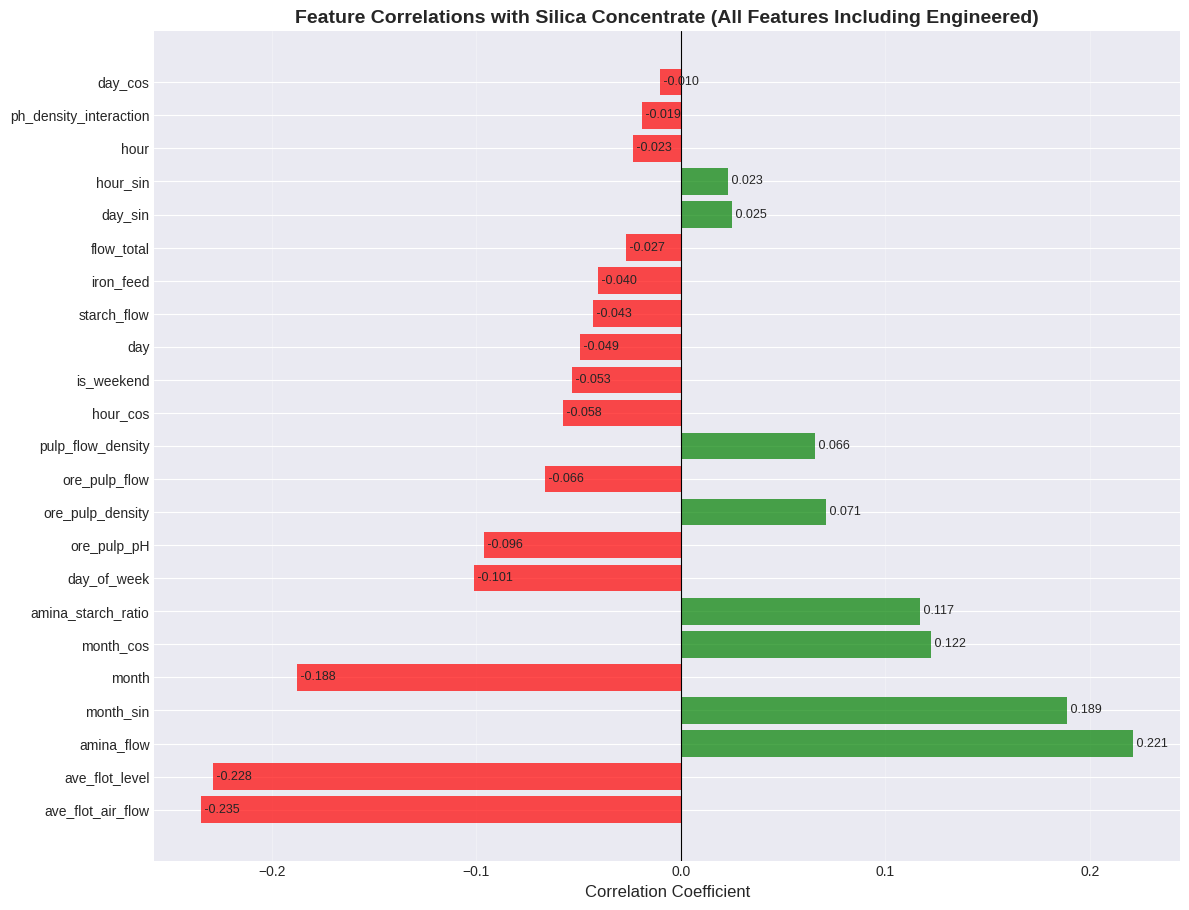


TOP CORRELATED FEATURES WITH TARGET

Top 5 Positive Correlations:
  amina_flow: 0.221
  month_sin: 0.189
  month_cos: 0.122
  amina_starch_ratio: 0.117
  ore_pulp_density: 0.071

Top 5 Negative Correlations:
  ave_flot_air_flow: -0.235
  ave_flot_level: -0.228
  month: -0.188
  day_of_week: -0.101
  ore_pulp_pH: -0.096


In [18]:
# Focus on correlations with target variable for ALL features (including engineered)
target_corr_all = correlation_matrix_all['silica_concentrate'].sort_values(key=abs, ascending=False)
target_corr_all = target_corr_all[target_corr_all.index != 'silica_concentrate']  # Remove self-correlation

print("=" * 60)
print("CORRELATION WITH TARGET VARIABLE (silica_concentrate) - ALL FEATURES")
print("=" * 60)
print(target_corr_all)

# Visualize correlations with target for all features
fig, ax = plt.subplots(figsize=(12, max(8, len(target_corr_all) * 0.4)))
colors = ['red' if x < 0 else 'green' for x in target_corr_all.values]
bars = ax.barh(target_corr_all.index, target_corr_all.values, color=colors, alpha=0.7)
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Feature Correlations with Silica Concentrate (All Features Including Engineered)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, val) in enumerate(target_corr_all.items()):
    ax.text(val, i, f' {val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Highlight top correlations (both positive and negative)
print("\n" + "=" * 60)
print("TOP CORRELATED FEATURES WITH TARGET")
print("=" * 60)
print("\nTop 5 Positive Correlations:")
top_positive = target_corr_all[target_corr_all > 0].nlargest(5)
for feat, corr in top_positive.items():
    print(f"  {feat}: {corr:.3f}")

print("\nTop 5 Negative Correlations:")
top_negative = target_corr_all[target_corr_all < 0].nsmallest(5)
for feat, corr in top_negative.items():
    print(f"  {feat}: {corr:.3f}")


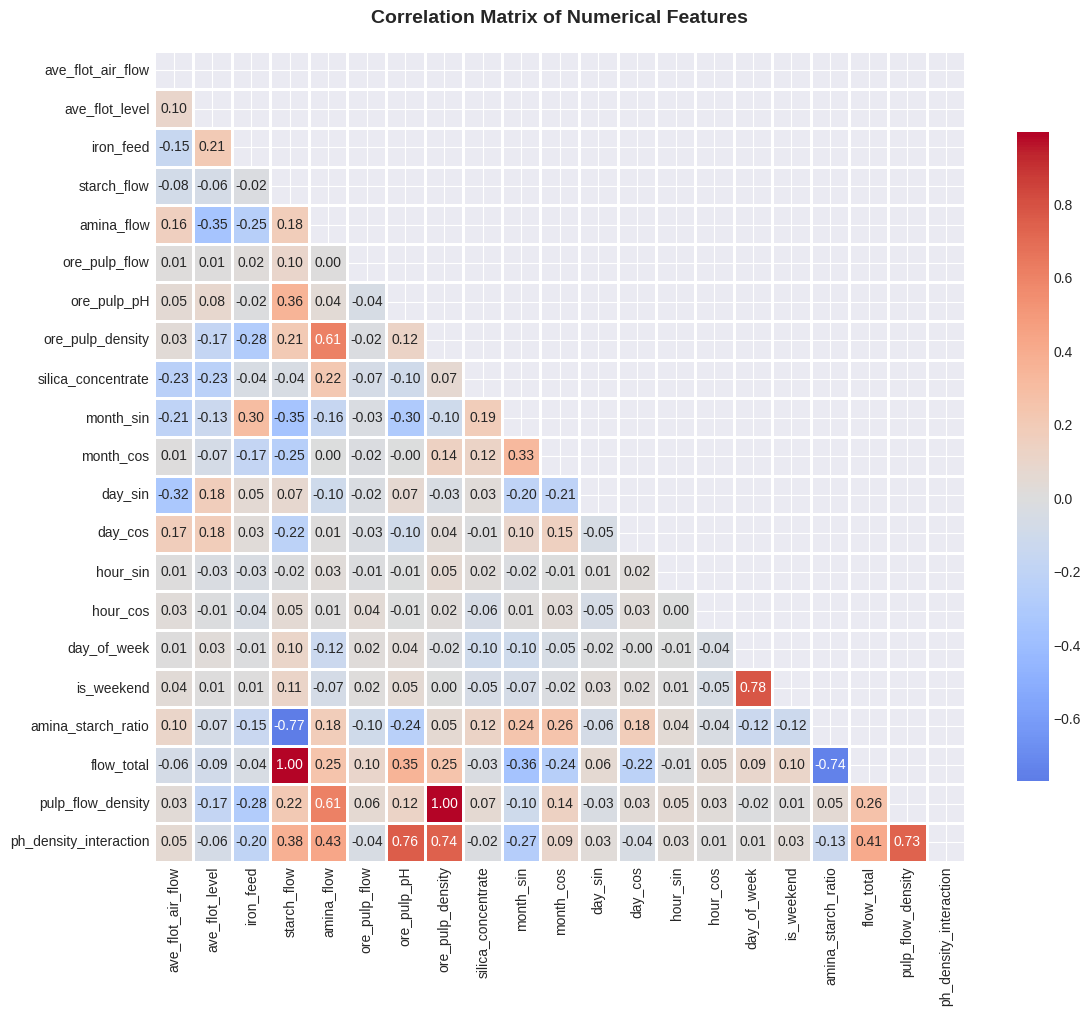

In [19]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


CORRELATION WITH TARGET VARIABLE (silica_concentrate)
ave_flot_air_flow        -0.235
ave_flot_level           -0.228
amina_flow                0.221
month_sin                 0.189
month_cos                 0.122
amina_starch_ratio        0.117
day_of_week              -0.101
ore_pulp_pH              -0.096
ore_pulp_density          0.071
ore_pulp_flow            -0.066
pulp_flow_density         0.066
hour_cos                 -0.058
is_weekend               -0.053
starch_flow              -0.043
iron_feed                -0.040
flow_total               -0.027
day_sin                   0.025
hour_sin                  0.023
ph_density_interaction   -0.019
day_cos                  -0.010
Name: silica_concentrate, dtype: float64


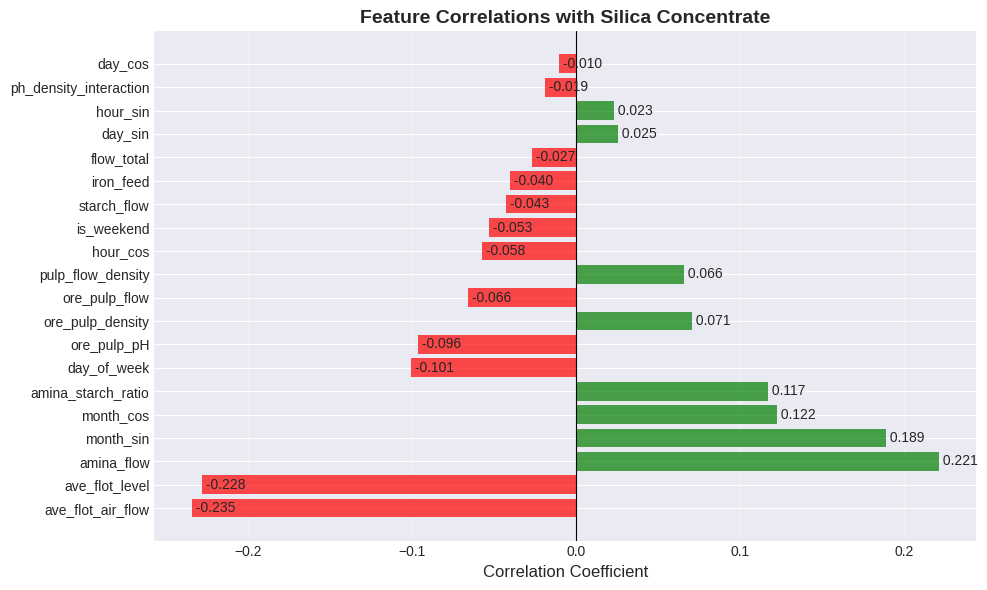

In [20]:
# Focus on correlations with target variable (silica_concentrate)
target_corr = correlation_matrix['silica_concentrate'].sort_values(key=abs, ascending=False)
target_corr = target_corr[target_corr.index != 'silica_concentrate']  # Remove self-correlation

print("=" * 60)
print("CORRELATION WITH TARGET VARIABLE (silica_concentrate)")
print("=" * 60)
print(target_corr)

# Visualize correlations with target
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
bars = ax.barh(target_corr.index, target_corr.values, color=colors, alpha=0.7)
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Feature Correlations with Silica Concentrate', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, val) in enumerate(target_corr.items()):
    ax.text(val, i, f' {val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


## 7. Outlier Detection


In [21]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)

outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percent,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Min Value': df[col].min(),
        'Max Value': df[col].max()
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION (IQR Method)
               Feature  Outlier Count  Outlier Percentage  Lower Bound  Upper Bound  Min Value  Max Value
     ave_flot_air_flow              0               0.000      279.165      312.440    282.466    301.339
        ave_flot_level              9               0.495      271.575      637.457    306.749    767.640
             iron_feed              0               0.000       35.630       81.070     43.370     65.780
           starch_flow             16               0.881      914.012     5288.861    401.629   5556.094
            amina_flow              3               0.165      307.414      700.363    301.264    715.748
         ore_pulp_flow             66               3.632      398.047      401.944    396.331    403.178
           ore_pulp_pH             19               1.046        9.107       10.702      8.809     10.758
      ore_pulp_density             29               1.596        1.558        1.812      1.546      1.798
    silica_conc

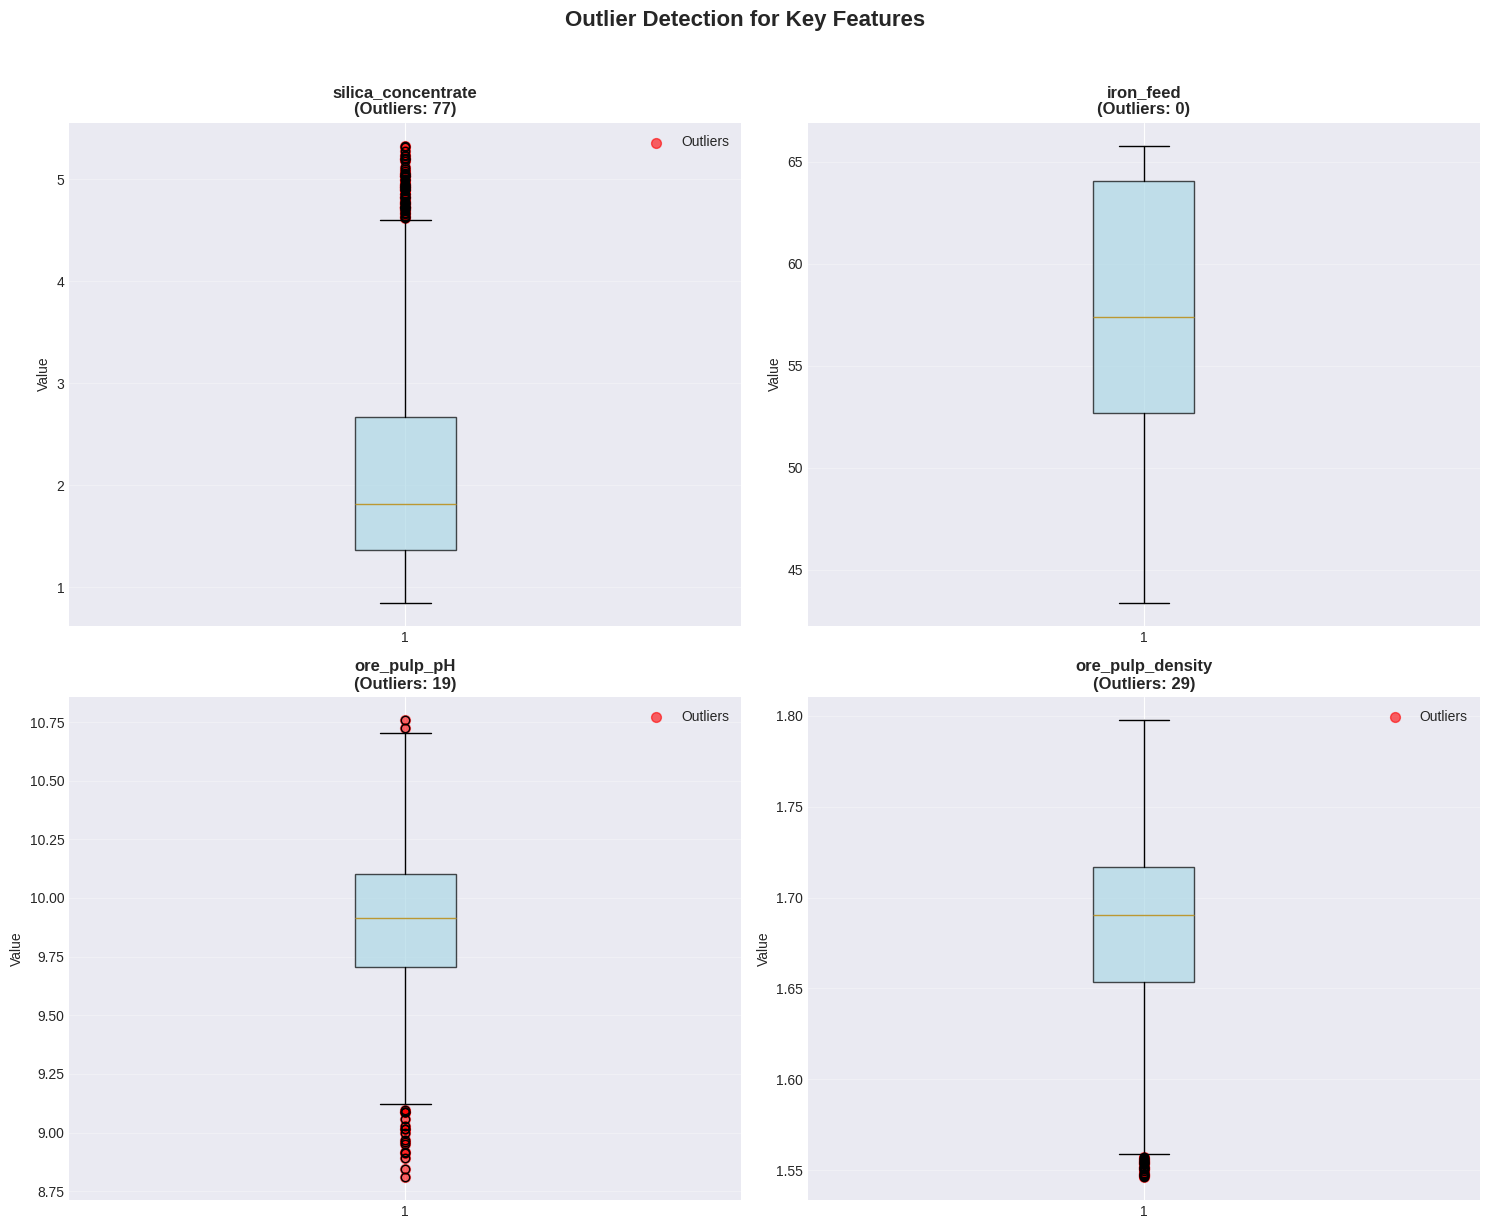

In [22]:
# Visualize outliers for key features
key_features = ['silica_concentrate', 'iron_feed', 'ore_pulp_pH', 'ore_pulp_density']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(key_features):
    ax = axes[i]
    bp = ax.boxplot(df[col], vert=True, patch_artist=True, showfliers=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Highlight outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    if len(outliers) > 0:
        ax.scatter([1] * len(outliers), outliers[col].values, 
                  color='red', marker='o', s=50, alpha=0.6, label='Outliers')
    
    ax.set_title(f'{col}\n(Outliers: {len(outliers)})', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3, axis='y')
    if len(outliers) > 0:
        ax.legend()

plt.suptitle('Outlier Detection for Key Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 8. Feature Relationships


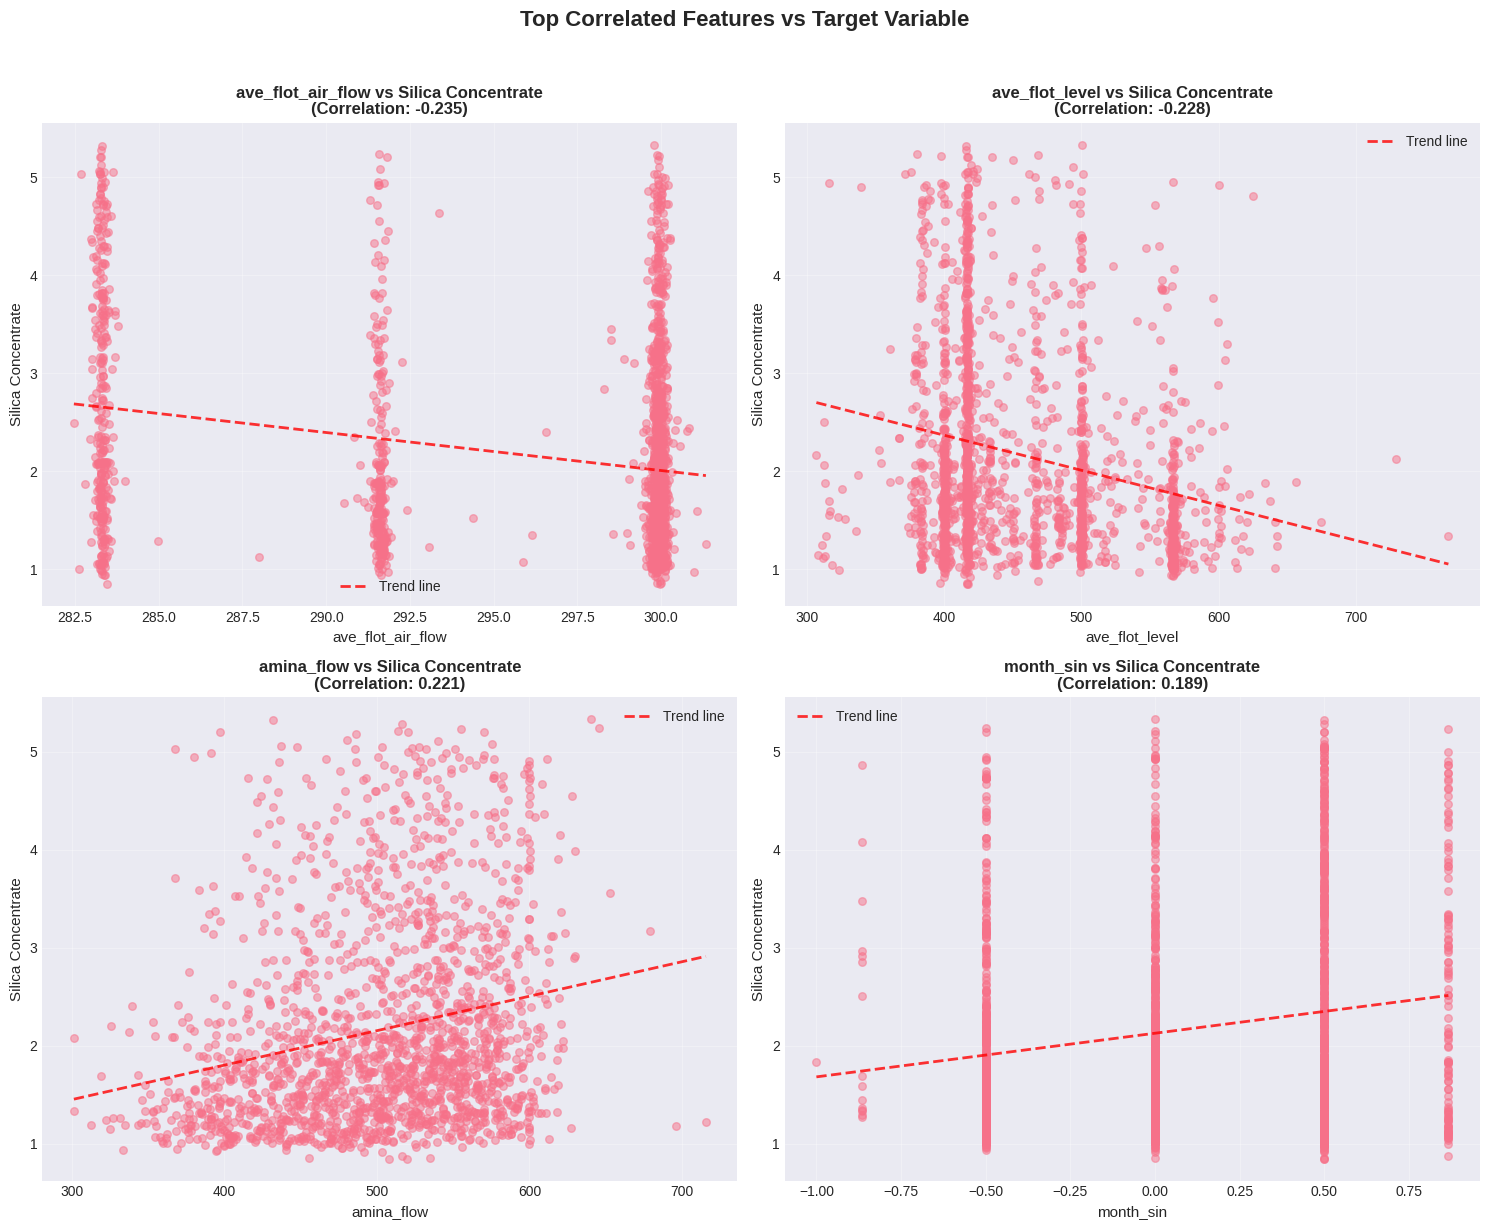

In [23]:
# Scatter plots of top correlated features with target
top_features = target_corr.abs().nlargest(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    ax.scatter(df[feature], df['silica_concentrate'], alpha=0.5, s=30)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Silica Concentrate', fontsize=11)
    ax.set_title(f'{feature} vs Silica Concentrate\n(Correlation: {target_corr[feature]:.3f})', 
                fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[feature], df['silica_concentrate'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature].sort_values(), p(df[feature].sort_values()), 
           "r--", alpha=0.8, linewidth=2, label='Trend line')
    ax.legend()

plt.suptitle('Top Correlated Features vs Target Variable', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


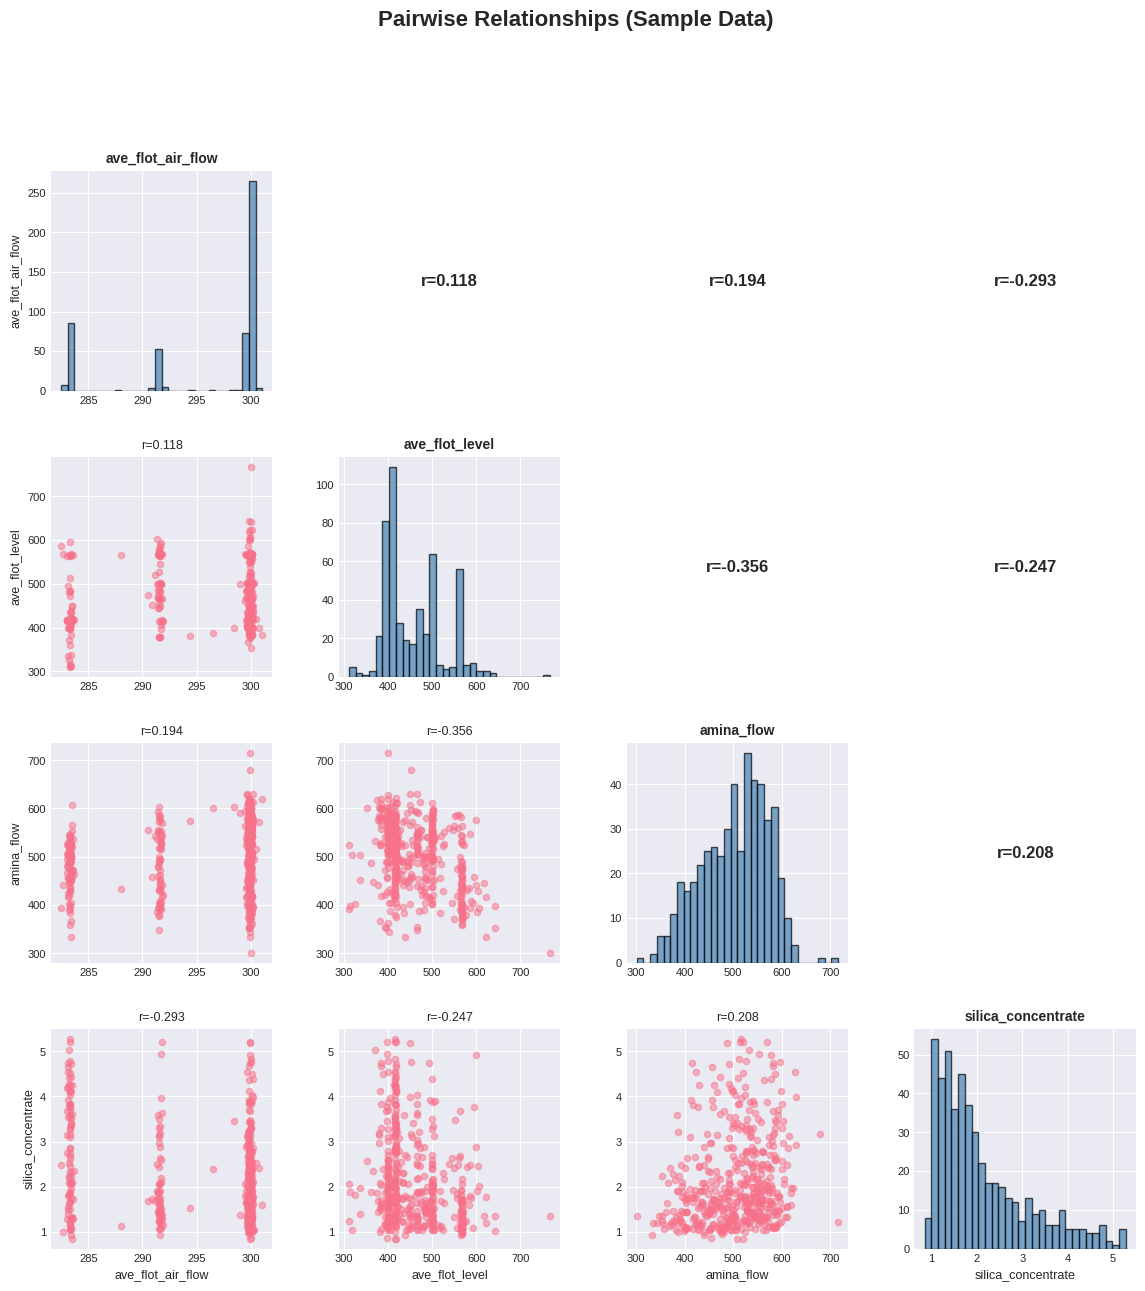

In [24]:
# Pair plot for top features (sample data for performance)
sample_size = min(500, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

top_features_with_target = top_features[:3] + ['silica_concentrate']
pair_plot_df = df_sample[top_features_with_target]

fig = plt.figure(figsize=(14, 14))
gs = fig.add_gridspec(len(top_features_with_target), len(top_features_with_target), 
                     hspace=0.3, wspace=0.3)

for i, row_feat in enumerate(top_features_with_target):
    for j, col_feat in enumerate(top_features_with_target):
        ax = fig.add_subplot(gs[i, j])
        
        if i == j:
            # Diagonal: histogram
            ax.hist(pair_plot_df[row_feat], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
            ax.set_title(f'{row_feat}', fontsize=10, fontweight='bold')
        elif i > j:
            # Lower triangle: scatter plot
            ax.scatter(pair_plot_df[col_feat], pair_plot_df[row_feat], alpha=0.5, s=20)
            corr_val = pair_plot_df[col_feat].corr(pair_plot_df[row_feat])
            ax.set_title(f'r={corr_val:.3f}', fontsize=9)
        else:
            # Upper triangle: empty or correlation text
            corr_val = pair_plot_df[col_feat].corr(pair_plot_df[row_feat])
            ax.text(0.5, 0.5, f'r={corr_val:.3f}', ha='center', va='center', 
                   fontsize=12, fontweight='bold', transform=ax.transAxes)
            ax.axis('off')
        
        if i == len(top_features_with_target) - 1:
            ax.set_xlabel(col_feat, fontsize=9)
        if j == 0:
            ax.set_ylabel(row_feat, fontsize=9)
        ax.tick_params(labelsize=8)

plt.suptitle('Pairwise Relationships (Sample Data)', fontsize=16, fontweight='bold', y=0.995)
plt.show()


## 9. Summary Statistics and Insights


In [25]:
# Summary statistics for target variable
print("=" * 60)
print("TARGET VARIABLE SUMMARY: silica_concentrate")
print("=" * 60)
target_stats = df['silica_concentrate'].describe()
print(target_stats)

print(f"\nAdditional Statistics:")
print(f"  Range: {df['silica_concentrate'].min():.3f} - {df['silica_concentrate'].max():.3f}")
print(f"  Coefficient of Variation: {(df['silica_concentrate'].std() / df['silica_concentrate'].mean()) * 100:.2f}%")
print(f"  Skewness: {df['silica_concentrate'].skew():.3f}")
print(f"  Kurtosis: {df['silica_concentrate'].kurtosis():.3f}")


TARGET VARIABLE SUMMARY: silica_concentrate
count   1817.000
mean       2.162
std        1.047
min        0.850
25%        1.370
50%        1.820
75%        2.670
max        5.330
Name: silica_concentrate, dtype: float64

Additional Statistics:
  Range: 0.850 - 5.330
  Coefficient of Variation: 48.45%
  Skewness: 1.157
  Kurtosis: 0.468


In [26]:
# Key insights summary
print("\n" + "=" * 60)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 60)

print("\n1. DATA OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Time period: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   - Features: {len(numeric_cols)} numerical features")
print(f"   - Missing values: {df.isnull().sum().sum()} ({(df.isnull().sum().sum() / len(df) * 100):.2f}%)")

print("\n2. TARGET VARIABLE (silica_concentrate):")
print(f"   - Mean: {df['silica_concentrate'].mean():.3f}")
print(f"   - Std: {df['silica_concentrate'].std():.3f}")
print(f"   - Range: {df['silica_concentrate'].min():.3f} - {df['silica_concentrate'].max():.3f}")

print("\n3. TOP CORRELATED FEATURES WITH TARGET:")
for i, (feat, corr) in enumerate(target_corr.abs().nlargest(3).items(), 1):
    direction = "positive" if target_corr[feat] > 0 else "negative"
    print(f"   {i}. {feat}: {target_corr[feat]:.3f} ({direction} correlation)")

print("\n4. DATA QUALITY:")
print(f"   - Duplicate rows: {df.duplicated().sum()}")
outlier_counts = [len(detect_outliers_iqr(df, col)[0]) for col in numeric_cols]
print(f"   - Features with outliers: {sum(1 for count in outlier_counts if count > 0)}/{len(numeric_cols)}")

print("\n5. DISTRIBUTION CHARACTERISTICS:")
high_skew = [col for col in numeric_cols if abs(df[col].skew()) > 1]
if high_skew:
    print(f"   - Highly skewed features (|skew| > 1): {', '.join(high_skew)}")
else:
    print("   - No highly skewed features detected")

print("\n" + "=" * 60)



KEY INSIGHTS FROM DATA EXPLORATION

1. DATA OVERVIEW:
   - Total records: 1,817
   - Time period: 2017-04-24 to 2017-09-08
   - Features: 21 numerical features
   - Missing values: 0 (0.00%)

2. TARGET VARIABLE (silica_concentrate):
   - Mean: 2.162
   - Std: 1.047
   - Range: 0.850 - 5.330

3. TOP CORRELATED FEATURES WITH TARGET:
   1. ave_flot_air_flow: -0.235 (negative correlation)
   2. ave_flot_level: -0.228 (negative correlation)
   3. amina_flow: 0.221 (positive correlation)

4. DATA QUALITY:
   - Duplicate rows: 0
   - Features with outliers: 12/21

5. DISTRIBUTION CHARACTERISTICS:
   - Highly skewed features (|skew| > 1): ave_flot_air_flow, silica_concentrate, month_cos, amina_starch_ratio



## 10. Next Steps

1. **Feature Engineering:**
   - Create time-based features (hour, day of week, etc.)
   - lag features for time series modeling?
   - Explore interaction terms between highly correlated features

2. **Data Preprocessing:**
   - Outlier-Handling if they represent measurement errors
   - Address any missing values if they appear in future data

3. **Modeling Considerations:**
   - Time series models (ARIMA, LSTM) may be appropriate given temporal structure
   - Feature selection based on correlations?
   - Cross-validation should respect temporal order

4. **Further Analysis:**
   - Relationships between process variables and target
   - Analyze operational regimes or patterns
   - Explore non-linear relationships
